In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import tensorflow.keras as keras
import os 
from utils.explanations import calculate_cam_attributions

c:\Users\boent\anaconda3\envs\xai-tsc\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


### Load Data

In [2]:
from utils.utils import read_dataset


archive = 'ucr'
dataset_name = 'Beef'
data_p = 'G:/Meine Ablage/master thesis/code/xai-tsc'
dataset = 'Beef'
model_type ='resnet'
ylen = 1
data = read_dataset(data_p, archive, dataset, 'original', ylen)[dataset]
ylen = len(data[0][0])
ig_data_stl  = read_dataset(data_p, archive, dataset, f'{model_type}_ig_raw', ylen)[dataset]
dataset = 'Beef'
itr = 0
ig_link = f'./results/ucr/{dataset}/experiment_1/{model_type}/{model_type}_{itr}/original/best_model.hdf5'
ig_model = keras.models.load_model(ig_link ,compile=False)


In [3]:
%matplotlib inline

train_att = ig_data_stl[1] 
ts = 20
sorted_vals = np.argsort(train_att[ts])
xvals = ig_data_stl[0][ts]
count = 230
ytrue  = data[1][ts]
pred_label = np.argmax(ig_model.predict(ig_data_stl[0])[ts])
#print(xvals)
sup_array = []
for idx in range(0, len(sorted_vals), 2):
    sup_x  = xvals.copy()
    #print(sorted_vals[:idx])
    #print(sorted_vals[:idx])
    sup_x[sorted_vals[:idx]] = np.nan 
    # Indices of non-NaN values
    not_nan_indices = np.arange(len(sup_x))[~np.isnan(sup_x)]
    # Linearly interpolate NaN values
    interpolated_array = np.interp(np.arange(len(sup_x)), not_nan_indices, sup_x[not_nan_indices])
    sup_array.append(interpolated_array)


sup_array = np.array(sup_array)

1/1 [==============================] - 1s 502ms/step


In [4]:
def get_len_and_step_size(attributions, slices=5):
    attr_len  = len(attributions)
    step_size = int(attr_len / slices)
    return attr_len,step_size

In [6]:
from utils.explanations import calculate_ig_attributions
ig_attr = calculate_ig_attributions(root_dir, archive, 'resnet_3', dataset_name, 'original', task=0)

G:/Meine Ablage/master thesis/code/xai-tsc/results/ucr/Beef//experiment_1/resnet/resnet_3/original/last_model.hdf5
1/1 [==============================] - 0s 68ms/step


470


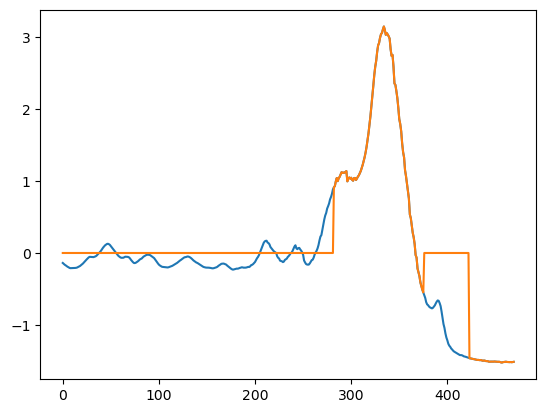

4

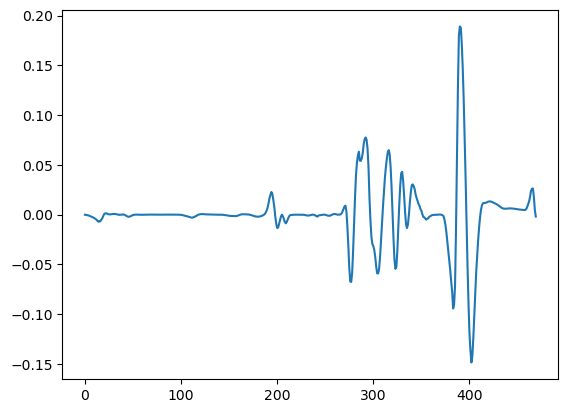

In [7]:
model = model_type
root_dir = data_p


#attr = calculate_ig_attributions(root_dir, archive, 'fcn_1', dataset_name, 'original', task=0)
#print(attr)

ts=20


#print([attr[ts][0]])
output = []
for a in range(2): 
    attr =  ig_attr[a]
    attr_len, step_size = get_len_and_step_size(attr[0][2],10)
    explanations = []

    for ts in range(len(attr)):
        sl = None
        mean_att = 0
        l1,l2 = (0,0)
        #print(attr_len, step_size)
        x_vec = []
        attr_vec  = [] 
        for i,x in enumerate(range(0,attr_len,step_size)):
            lower_bound = attr[ts][1][x]
            upper_bound = attr[ts][1][x+step_size-1]
            #axes[0].axvspan(lower_bound,upper_bound,color="red",alpha=0.3)
            cur = attr[ts][2][x:x+step_size].numpy().mean()
            #cur = attr[ts][2][x:x+step_size].numpy().max() 
            x_vec.append(attr[ts][1][x:x+step_size] )
            attr_vec.append(cur)
            if cur > mean_att: 
                sl = i
                mean_att = cur 
                l1,l2 = (lower_bound, upper_bound)

        keep_rate = 3
        kept = 0
        new_ts = attr[ts][1].copy()
        #print(np.argsort(attr_vec)[::-1][:keep_rate])
        for i,x in enumerate(range(0,attr_len,step_size)): 
            #print(x,x+step_size,len(new_ts[x:x+step_size]),len(x_vec[i]),len([0]*len(x_vec[i])))
            if i not in np.argsort(attr_vec)[::-1][:keep_rate]: new_ts[x:x+step_size] = 0
        explanations.append(np.concatenate((new_ts,np.array([attr[ts][1]])), axis=None))    
    output.append(explanations)




"""

drop_rate = 6 # out of 10
new_ts = list([0]*10)
for i,pos in enumerate(np.argsort(attr_vec)[::-1]):
    if i < drop_rate : new_ts[pos] = x_vec[pos]
    else: new_ts =  new_ts[pos] = [0]*len(x_vec[i])
    
    #if i < drop_rate : new_ts = np.concatenate((new_ts,(x_vec[i])))
    #else: new_ts = np.concatenate((new_ts,[0]*len(x_vec[i])))

"""    
    
print(len(new_ts))
#print(new_ts)
plt.plot(attr[ts][1])
plt.plot(new_ts)


plt.show()
#axes[0].scatter(x=attr[ts][1], y=attr[ts][2], linewidths=0.0)
#axes[1].scatter(x=attr[ts][1], y=attr[ts][2], c=attr[ts][3], cmap='jet', marker='.', s=2, vmin=0, vmax=100, linewidths=2.0)
#axes[2].scatter(x=attr[ts][1], y=attr[ts][2], c=attr[ts][3], cmap='jet', marker='.', s=2, vmin=0, vmax=100, linewidths=2.0)

#fig.colorbar(sp)
#axes[2].axvspan(l1,l2,color="red",alpha=0.3)

#for i,x in enumerate(range(0,2000,400)):
#    axes[0].axvspan(attr[ts][1][x],attr[ts][1][x+step_size-1],color="red",alpha=0.3)
plt.plot(attr[ts][2])
4

In [177]:
from tensorflow import keras
model_path=f'./results/ucr/{dataset}/experiment_2/resnet/resnet_mt_ae_0.75_2/resnet_ig_trf/best_model.hdf5'
ig_model = keras.models.load_model(model_path ,compile=False)


1/1 [==============================] - 0s 127ms/step


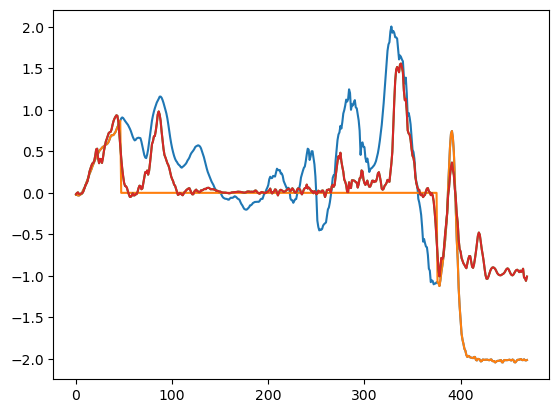

In [175]:
ts = 20
plt.plot(output[1][ts][470:])
plt.plot(output[1][ts][:470])
plt.plot(ig_model.predict(data[2])[1][ts].flatten())
plt.plot(ig_model.predict(data[2])[1][ts].flatten())

1/1 [==============================] - 0s 126ms/step


array([[1.        , 0.92719563],
       [0.92719563, 1.        ]])

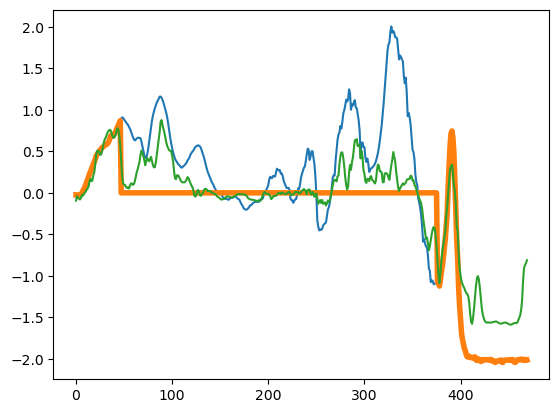

In [178]:
ts = 20
plt.plot(output[1][ts][470:])

#plt.plot(attr[ts][2])
plt.plot(output[1][ts][:470],linewidth=4)
#plt.plot(ig_model.predict(data[2])[1][ts].flatten())
plt.plot(ig_model.predict(data[2])[1][ts].flatten())
np.corrcoef(output[1][ts][:470],ig_model.predict(data[2])[1][ts].flatten())

In [8]:
from utils.explanations import save_explanations

save_explanations(np.array(output), root_dir, archive, f'{model}_ig_trf', dataset_name)

(30, 940) (30, 940)
Successfully created explanation done.


In [203]:
for i in range(2): 
    print(i)

0
1


In [78]:
[] + [1,2]

[1, 2]

In [42]:
470/94

5.0

### Compute metrics

In [70]:
import pandas as pd 
import os
from utils.explanations import minmax_norm


def load_model(root_dir, archive_name, dataset_name, classifier, data_source): 
    model_path = f'{root_dir}/results/{archive_name}/{dataset_name}/' \
                                            + f'{classifier.split("_")[0]}/{classifier}/{data_source}/' \
                                            + f'best_model.hdf5'
    model =keras.models.load_model(model_path ,compile=False)
    return model


root_dir ='G:/Meine Ablage/master thesis/code/xai-tsc'
archive_name = 'ucr'
classifier = 'fcn_1.0'
data_source = 'original'
dataset_name = 'GunPoint'

model = load_model(root_dir, archive_name, dataset_name, classifier, data_source)


ValueError: Exception encountered when calling layer "model_140" "                 f"(type Functional).

Input 0 of layer "conv1d" is incompatible with the layer: expected min_ndim=3, found ndim=0. Full shape received: ()

Call arguments received by layer "model_140" "                 f"(type Functional):
  • inputs=['tf.Tensor(shape=(), dtype=int32)']
  • training=False
  • mask=None

1/1 [==============================] - 0s 34ms/step
[1.]
8/8 [==============================] - 0s 20ms/step
0


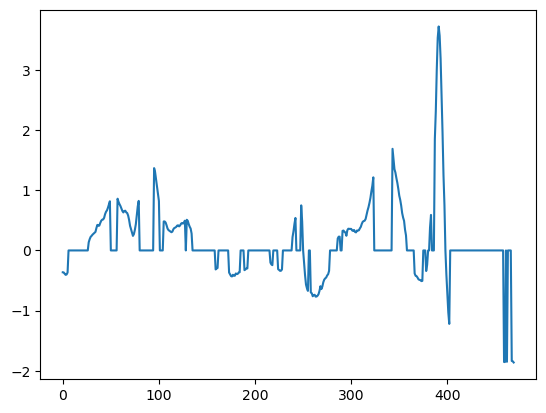

0.2553191489361702


In [26]:
%matplotlib inline

train_att = ig_data_stl[1] 
ts = 0
sorted_vals = np.argsort(train_att[ts])
xvals = ig_data_stl[0][ts]
count = 230
ytrue  = data[1][ts]
pred_label = np.argmax(ig_model.predict(ig_data_stl[0])[ts])
#print(xvals)
sup_array = []
print(ytrue)
for idx in range(0, len(sorted_vals), 2):
    sup_x  = xvals.copy()
    #print(sorted_vals[:idx])
    #print(sorted_vals[:idx])
    sup_x[sorted_vals[:idx]] = 0 
    #= np.nan 

    """
    # Indices of non-NaN values
    not_nan_indices = np.arange(len(sup_x))[~np.isnan(sup_x)]
    # Linearly interpolate NaN values
    interpolated_array = np.interp(np.arange(len(sup_x)), not_nan_indices, sup_x[not_nan_indices])
    
    """
    sup_array.append(sup_x)

sup_array = np.array(sup_array)
ig_model.predict([[0]*470])
pred = ig_model.predict(sup_array)
print(pred_label)
#print(sup_array[50])
#plt.plot(sup_array[140])

plt.plot
plt.plot(sup_array[120])
#plt.plot(pred[:,pred_label])
plt.show()

print(120/470)

In [133]:
from utils.constants import CAM_LAYERS
from utils.explanations import get_layer_index



#get gap and output layer
gap = CAM_LAYERS[classifier.split("_")[0]]["gap_layer"]
gap = get_layer_index(model, gap)
out = CAM_LAYERS[classifier.split("_")[0]]["task_1"]
out = get_layer_index(model, out)

        
w_k_c = model.layers[out].get_weights()[0]  # weights for each filter k for each class c
print(w_k_c.shape)

# the same input
new_input_layer = model.inputs
new_output_layer = [model.layers[gap].output, model.layers[out].output]
new_feed_forward = keras.backend.function(new_input_layer, new_output_layer)

#print(w_k_c)

[conv_out, predicted] = new_feed_forward(x_train)

print(conv_out.shape)

keras.layers.TimeDistributed()(conv_out).shape

#keras.layers.average(conv_out[2])

print()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1370828018.py, line 31)

In [53]:
%matplotlib inline
_,_,x,y = data 

#zero_vec = [0[]*150]

def compute_less_inf_ts(x):
    baseline_pred = np.float64(10)
    optimal = [.5,.5]
    best_p = None
    id = None
    for idx,p in enumerate(model.predict(x)[0]): 
        #print(np.sum((p-optimal)**2))
        if baseline_pred > np.sum((p-optimal)**2):
            baseline_pred =  np.sum((p-optimal)**2)
            best_p = p 
            id = idx
    return best_p, id 


def compute_baseline(x):
    pass


[[-1.5774686   0.5917025   1.95147477  0.36307353 -0.7361203  -0.15649664
   0.38312244 -0.40758179 -2.0008328  -0.4611227   1.91507551  1.51162555
  -0.58734659  0.55131646  1.13966985 -2.41825224 -0.42978368  1.64621701
   1.13104043  0.99546527  0.50345784  0.16901782  1.95362407 -0.40706201
   1.95009192 -0.77775899  0.96508302  0.2825856   0.46777326 -0.83328314
   2.85416786  1.51776964  1.20270938  1.01383927  0.00581295 -0.19349072
   0.27058558 -0.74731282  0.98368935  0.40610618  1.37014213 -2.53089737
   0.1810523  -0.53186864 -1.03189499  0.08716399 -2.02982761  1.93405508
   0.26891509  0.60729374  0.3093282  -0.60364997  2.32700391 -0.39861729
  -0.79127065 -2.00743168 -0.93726357  0.90260458 -0.27208731 -0.2896768
  -0.35474941 -0.75263124  1.56856837  0.45424395 -0.07033643  0.033361
   0.04855153 -1.01858969 -0.62489534 -1.72164616 -0.40597104 -0.18308553
   0.4835028   0.6512572   0.73124786  0.46045606 -0.5067719   1.16199786
  -0.56269068 -0.30047201  0.57481753 -0.

array([[1.2943183e-15, 1.0000000e+00]], dtype=float32)

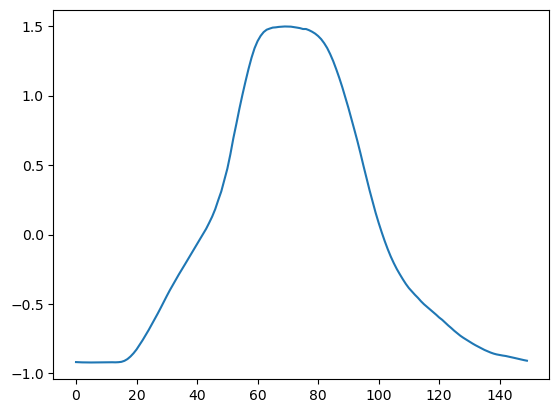

In [132]:
avg = np.average(x, axis=0)
#print(avg)
plt.plot(avg)

model = load_model(root_dir, archive_name, dataset_name, classifier, data_source)

avg = np.expand_dims(avg, axis=0)
zeros = np.zeros((1,150))
random = np.random.randn((150))
random = np.expand_dims(random, axis=0)
print(random)
#print(avg,avg.shape)
#p = model.predict(x)
model.predict(random)

In [261]:

np.random.choice(np.arange(len(x)), int(len(x)*(1-0.93)))

array([18])

In [54]:
def acc(pred,suppred): 
    print(len(pred),len(suppred))
    tp = 0 
    for p, sp in zip(pred,suppred):
        #print(np.argmax(p),np.argmax(sp))
        if np.argmax(p) == np.argmax(sp): tp+=1
    return tp / len(pred)
    

supp_strat = x[12]

stl_classifier = 0
mtl_classifier = 0

for itr in range(5):
    keep = 0.85
    replace = np.random.choice(np.arange(len(x[0])), int(len(x[0])*(1-keep)))
    print("Randomly Replaced Values: ", len(x[0]),len(replace))
    #originally most attibuted parts
    root_dir ='G:/Meine Ablage/master thesis/code/xai-tsc'
    archive_name = 'ucr'
    classifier = 'fcn_1.0'
    data_source = 'original'
    dataset_name = 'GunPoint'

    print(root_dir, archive_name, dataset_name, classifier, data_source)
    model = load_model(root_dir, archive_name, dataset_name, classifier, data_source)

    p = model.predict(x)
    print(model.predict([[0]*len(x[0])]))

    idx = 1
    print(root_dir, archive_name, classifier, dataset_name, data_source)
    ao = calculate_cam_attributions(root_dir, archive_name, classifier, dataset_name, data_source)[idx]
    supp_x_vals_org = []
    for xv, xa in zip(x,ao):
        xa = xa[2]
        supp_x  = xv.copy()
        # sort highest  values first and then just keep n values after certrain threshhold:
        #  0 --> keep no values, 1 --> keep all
        sorted = replace #np.random.choice(np.arange(len(x)), int(len(x)*(1-0.93)))
        #(np.argsort(xa)[::-1][int(len(xa)*keep):])
        supp_x[sorted] = 0 #supp_strat[sorted]
        supp_x_vals_org.append(supp_x)

    #print(x[0]==supp_x_vals[0])
    spo =  model.predict(np.array(supp_x_vals_org))

    #print(spo)
    stl_classifier += acc(p,spo)

    # keep most attributed parts 

    root_dir ='G:/Meine Ablage/master thesis/code/xai-tsc'
    archive_name = 'ucr'
    classifier = 'resnet_mt_dense_0.5'
    data_source = 'resnet_raw_mse'
    dataset_name = 'GunPoint'

    print(root_dir, archive_name, dataset_name, classifier, data_source)
    model = load_model(root_dir, archive_name, dataset_name, classifier, data_source)

    p = model.predict(x)

    #INDEX TRAIN or TEST
    idx = 1
    print(root_dir, archive_name, classifier, dataset_name, data_source)
    aa = calculate_cam_attributions(root_dir, archive_name, classifier, dataset_name, data_source)[idx]
    supp_x_vals_att = []
    for xv, xa in zip(x,aa):
        xa = xa[2]
        supp_x  = xv.copy()
        # sort highest  values first and then just keep n values after certrain threshhold:
        #  0 --> keep no values, 1 --> keep all
        sorted = replace#(np.argsort(xa)[::-1][int(len(xa)*keep):])
        #print(np.argsort(xa)[::-1][int(len(xa)*0.5):])
        supp_x[sorted] = 0 #supp_strat[sorted]
        supp_x_vals_att.append(supp_x)

    #print(x[0]==supp_x_vals[0])
    spa =  model.predict(np.array(supp_x_vals_att))


    mtl_classifier += acc(p[0],spa[0])

    continue

    # keep most predicted attributed parts
    supp_x_vals_pred = []
    for xv, pa in zip(x,p[1]):
        pa = pa.flatten()
        supp_x  = xv.copy()
        sorted = replace#(np.argsort(pa)[::-1][int(len(pa)*keep):])
        supp_x[sorted] = 0 #supp_strat[sorted]
        supp_x_vals_pred.append(supp_x)

    spp =  model.predict(np.array(supp_x_vals_pred))

    print(acc(p[0],spp[0]))
    #plt.plot(supp_x_vals[0])

        #print(index[:int(len(index)*0.5)])
        #print(len(supp_x[index[:int(len(index)*0.5)]]))

    #for cp,ap in p: 
        #pass
        #classp = np.argmax(cp)



Randomly Replaced Values:  150 22
G:/Meine Ablage/master thesis/code/xai-tsc ucr GunPoint fcn_1.0 original
1/1 [==============================] - 0s 207ms/step
[[1.0000000e+00 3.3167447e-12]]
G:/Meine Ablage/master thesis/code/xai-tsc ucr fcn_1.0 GunPoint original
5/5 [==============================] - 0s 8ms/step
150 150
G:/Meine Ablage/master thesis/code/xai-tsc ucr GunPoint resnet_mt_dense_0.5 resnet_raw_mse
5/5 [==============================] - 0s 21ms/step
G:/Meine Ablage/master thesis/code/xai-tsc ucr resnet_mt_dense_0.5 GunPoint resnet_raw_mse
5/5 [==============================] - 0s 18ms/step
150 150
Randomly Replaced Values:  150 22
G:/Meine Ablage/master thesis/code/xai-tsc ucr GunPoint fcn_1.0 original
1/1 [==============================] - 0s 188ms/step
[[1.0000000e+00 3.3167447e-12]]
G:/Meine Ablage/master thesis/code/xai-tsc ucr fcn_1.0 GunPoint original
5/5 [==============================] - 0s 8ms/step
150 150
G:/Meine Ablage/master thesis/code/xai-tsc ucr GunPoint re

In [55]:
print(stl_classifier/5)
print(mtl_classifier/5)

"""
RESNET GUNPOINT 0.8
0.75: 
0.6386666666666667
0.708

0.5: 
0.692
0.6839999999999999

0.25
0.6826666666666666
0.6733333333333332

RESNET GUNPOINT 0.9
0.75
0.7146666666666667
0.8146666666666667

0.5
0.7813333333333334
0.884

RESNET COFFE 0.9:
0.75: 
0.9142857142857143
0.9285714285714285

RESNET COFFE 0.8: 
0.75
0.95
0.9214285714285715

0.5 
0.7428571428571429
0.5357142857142857

SIGMOID: 
0.7071428571428571
0.6285714285714284

RESNEt COFFE 0.85: 
0.8785714285714287
0.8357142857142857

"""


0.47333333333333333
0.728


'\nRESNET GUNPOINT 0.8\n0.75: \n0.6386666666666667\n0.708\n\n0.5: \n0.692\n0.6839999999999999\n\n0.25\n0.6826666666666666\n0.6733333333333332\n\nRESNET GUNPOINT 0.9\n0.75\n0.7146666666666667\n0.8146666666666667\n\n0.5\n0.7813333333333334\n0.884\n\nRESNET COFFE 0.9:\n0.75: \n0.9142857142857143\n0.9285714285714285\n\nRESNET COFFE 0.8: \n0.75\n0.95\n0.9214285714285715\n\n0.5 \n0.7428571428571429\n0.5357142857142857\n\nSIGMOID: \n0.7071428571428571\n0.6285714285714284\n\nRESNEt COFFE 0.85: \n0.8785714285714287\n0.8357142857142857\n\n'

baseline: -1
{False}
original / ae {True}
286


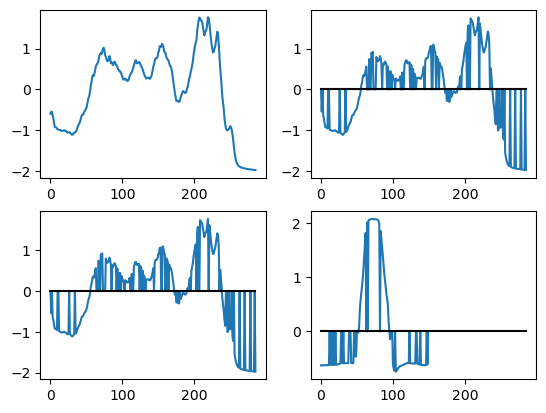

In [42]:

ts = 1
print("baseline:", -1)# p[0][12])
#print("before :", p[0][ts])
#print("after  :", sp[0][ts])
fix, ax = plt.subplots(nrows=2,ncols=2)

#Google Multitask Learning Adversarial Robustness time series


print(set(ao[ts][2] == aa[ts][2]))
print("original / ae", set(supp_x_vals_org[ts]==supp_x_vals_att[ts]))
length = len(supp_x_vals_org[ts])
print(length)
ax[0][0].plot(x[ts], label="orginal timeseries")
ax[0][1].plot(supp_x_vals_org[ts], label="baseline timeseries")
ax[0][1].plot([0]*length, c="black")
ax[1][0].plot(supp_x_vals_att[ts], label="suppressed timeseries")
ax[1][0].plot([0]*length, c="black")
ax[1][1].plot(supp_x_vals_pred[ts], label="suppressed timeseries")
ax[1][1].plot([0]*length, c="black")
#plt.legend()

In [92]:
print(x.shape)
count = 0
suppressed_arr = []
for xval in (x): 

    pred = model.predict(np.expand_dims(xval,axis=0))

    class_pred = np.argmax(pred[0])
    att_pred = pred[1].flatten()
    att_indicies = np.argsort(att_pred)[int(len(att_pred)*0.3):]
    #print(len(att_indicies),att_indicies)
    xsup = xval[att_indicies] = 0
    suppressed_arr.append(xval[att_indicies])
    supp_pred = np.argmax(model.predict(np.expand_dims(suppressed_arr,axis=0))[0])
    if(class_pred==supp_pred): count += 1

    #print(np.argmax(model.predict(np.expand_dims(xval,axis=1)[0])))
    #plt.plot(xval)


(50, 150)
1/1 [==============================] - 0s 23ms/step


InvalidArgumentError: Graph execution error:

Detected at node 'model/conv1d/Conv1D' defined at (most recent call last):
    File "c:\Users\boent\anaconda3\envs\xai-tsc\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\boent\anaconda3\envs\xai-tsc\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "c:\Users\boent\anaconda3\envs\xai-tsc\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\boent\anaconda3\envs\xai-tsc\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "c:\Users\boent\anaconda3\envs\xai-tsc\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "c:\Users\boent\anaconda3\envs\xai-tsc\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\boent\anaconda3\envs\xai-tsc\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "c:\Users\boent\anaconda3\envs\xai-tsc\lib\asyncio\base_events.py", line 1909, in _run_once
      handle._run()
    File "c:\Users\boent\anaconda3\envs\xai-tsc\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\boent\anaconda3\envs\xai-tsc\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "c:\Users\boent\anaconda3\envs\xai-tsc\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "c:\Users\boent\anaconda3\envs\xai-tsc\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "c:\Users\boent\anaconda3\envs\xai-tsc\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "c:\Users\boent\anaconda3\envs\xai-tsc\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "c:\Users\boent\anaconda3\envs\xai-tsc\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\boent\anaconda3\envs\xai-tsc\lib\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "c:\Users\boent\anaconda3\envs\xai-tsc\lib\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "c:\Users\boent\anaconda3\envs\xai-tsc\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\boent\anaconda3\envs\xai-tsc\lib\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\boent\anaconda3\envs\xai-tsc\lib\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\boent\anaconda3\envs\xai-tsc\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\boent\AppData\Local\Temp\ipykernel_8800\2226310925.py", line 5, in <module>
      model.predict(x[0])[0]
    File "c:\Users\boent\anaconda3\envs\xai-tsc\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\boent\anaconda3\envs\xai-tsc\lib\site-packages\keras\engine\training.py", line 2253, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "c:\Users\boent\anaconda3\envs\xai-tsc\lib\site-packages\keras\engine\training.py", line 2041, in predict_function
      return step_function(self, iterator)
    File "c:\Users\boent\anaconda3\envs\xai-tsc\lib\site-packages\keras\engine\training.py", line 2027, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\boent\anaconda3\envs\xai-tsc\lib\site-packages\keras\engine\training.py", line 2015, in run_step
      outputs = model.predict_step(data)
    File "c:\Users\boent\anaconda3\envs\xai-tsc\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
      return self(x, training=False)
    File "c:\Users\boent\anaconda3\envs\xai-tsc\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\boent\anaconda3\envs\xai-tsc\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\boent\anaconda3\envs\xai-tsc\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\boent\anaconda3\envs\xai-tsc\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\boent\anaconda3\envs\xai-tsc\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\boent\anaconda3\envs\xai-tsc\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\boent\anaconda3\envs\xai-tsc\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\boent\anaconda3\envs\xai-tsc\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\boent\anaconda3\envs\xai-tsc\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\boent\anaconda3\envs\xai-tsc\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\boent\anaconda3\envs\xai-tsc\lib\site-packages\keras\layers\convolutional\base_conv.py", line 283, in call
      outputs = self.convolution_op(inputs, self.kernel)
    File "c:\Users\boent\anaconda3\envs\xai-tsc\lib\site-packages\keras\layers\convolutional\base_conv.py", line 255, in convolution_op
      return tf.nn.convolution(
Node: 'model/conv1d/Conv1D'
output depth must be evenly divisible by number of groups: 128 vs 105
	 [[{{node model/conv1d/Conv1D}}]] [Op:__inference_predict_function_3313]

In [89]:
suppressed_arr[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [88]:
count / len(x)

1.0

### Save code

In [21]:
sorted_att = cam_att.sort_values(by=['gamma','pred head'], ascending=[False,False])
#cam_att.sort_values(by=['gamma','loss'], ascending=False)
threshold = 1e-11

# Replace values lower than the threshold with 0
sorted_att.loc[sorted_att['m1m'] < threshold, 'm1m'] = 0
sorted_att.to_csv(f"G:/Meine Ablage/master thesis/code/xai-tsc/results_csv/{dataset_name}.csv")
sorted_att

,classifier,pred head,gamma,loss,data,m1m,m1p,m1c,m2m,m2p,m2c,m3m,m3p,m3c,accuracy,precision,recall
0,fcn,sigmoid,1.0,mse,raw,0.000000,1.000000,1.000000,104.221667,-0.026378,0.273846,104.221664,-0.026378,0.273846,0.980000,0.981013,0.979730
10,fcn,relus,1.0,mse,raw,0.000000,1.000000,1.000000,106.608969,0.001876,0.024191,106.608966,0.001876,0.024191,0.980000,0.981013,0.979730
5,fcn,dense,1.0,mse,raw,0.000000,1.000000,1.000000,106.663086,-0.026682,0.006564,106.663082,-0.026682,0.006564,0.980000,0.981013,0.979730
15,fcn,ae,1.0,mse,raw,12.978000,0.949441,0.950195,106.414845,0.003145,0.088796,135.924802,-0.017752,0.057639,1.000000,1.000000,1.000000
1,fcn,sigmoid,0.75,mse,raw,19.137888,0.870570,0.884150,100.577680,0.329504,0.428366,88.268979,0.242262,0.386673,1.000000,1.000000,1.000000
11,fcn,relus,0.75,mse,raw,158.958916,0.499533,0.490758,60.408183,0.573990,0.628846,197.470379,0.248547,0.251253,0.960000,0.961004,0.960349
6,fcn,dense,0.75,mse,raw,61.935254,0.583015,0.597535,58.559389,0.571744,0.625426,66.823333,0.321255,0.356345,1.000000,1.000000,1.000000
18,fcn,ae,0.75,mse,raw,63.531765,0.636065,0.668885,15.509274,0.883746,0.889343,51.548575,0.613992,0.654608,0.986667,0.987179,0.986486
2,fcn,sigmoid,0.5,mse,raw,41.702725,0.737530,0.767639,100.439807,0.348158,0.442205,67.268621,0.217070,0.390541,0.993333,0.993506,0.993243
12,fcn,relus,0.5,mse,raw,137.449041,0.475663,0.469094,59.882942,0.587928,0.638238,157.483080,0.238734,0.238123,0.980000,0.980519,0.980263


### Visualize


In [19]:
# Load model 
model_path = "G:/Meine Ablage/master thesis/code/xai-tsc/results/ucr/Coffee/fcn/fcn_mt_sigmoid_0.5/fcn_minmax_cosinesim/"

fcn_mt_dense_1 = keras.models.load_model(model_path ,compile=False)

att_train, att_test = calculate_pointwise_attributions(root_dir, archive_name, classifier, dataset_name, data_source, mode, task=1)
dense1_pred = fcn_mt_dense_1.predict(x_test)[1]



G:/Meine Ablage/master thesis/code/xai-tsc/results/ucr/GunPoint/fcn/fcn_mt_sigmoid_0.5/pointwise/best_model.hdf5
yes
activation <keras.layers.core.activation.Activation object at 0x000001E5C764A050>
5/5 [==============================] - 0s 9ms/step


array([[9.99901831e-01, 9.99904633e-01, 9.87168789e-01, ...,
        9.99885559e-01, 9.99880910e-01, 9.99870598e-01],
       [6.86868094e-03, 7.04784971e-03, 2.49207260e-05, ...,
        7.12574553e-03, 7.11853290e-03, 6.56485790e-03],
       [3.68712645e-05, 3.97146105e-05, 1.33586378e-04, ...,
        1.77295573e-04, 3.22846259e-04, 2.10252620e-04],
       ...,
       [1.05068961e-04, 9.99394688e-05, 9.04992248e-06, ...,
        1.01885220e-04, 9.85423030e-05, 1.01683145e-04],
       [7.53364247e-06, 7.11217763e-06, 4.42550780e-04, ...,
        9.46807540e-06, 9.25836775e-06, 1.15062458e-05],
       [9.92516696e-01, 9.92755890e-01, 9.26447392e-01, ...,
        9.91312087e-01, 9.90955472e-01, 9.91018593e-01]], dtype=float32)

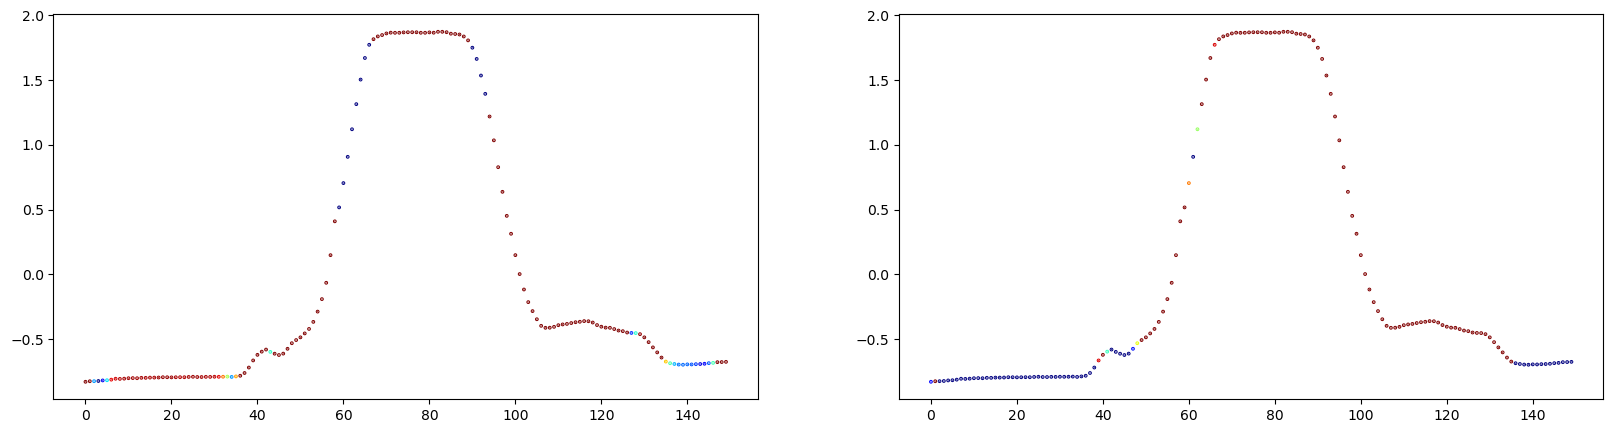

In [33]:
ts = 10
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
axes[0].scatter(np.arange(len(x_test[ts])),
         x_test[ts],c=y_test[ts]*100,cmap='jet', marker='.', s=2, vmin=-100, vmax=100, linewidths=2.0)

axes[1].scatter(np.arange(len(x_test[ts])),
         x_test[ts],c=att_test[ts][2]*100,cmap='jet', marker='.', s=2, vmin=-100, vmax=100, linewidths=2.0)


## Auto Encoder Structure


### Gamma 0


In [62]:
classifier = 'fcn_mt_ae_0.0'
model_path = f'{root_dir}/results/{archive_name}/{dataset_name}/' \
                                        + f'{classifier.split("_")[0]}/{classifier}/{data_source}/' \
                                        + f'best_model.hdf5'

fcn_ae_1 = keras.models.load_model(model_path ,compile=False)

ae1_pred = fcn_ae_1.predict(x_test)[1]

#print(ae1_pred[0].flatten())
# Should be the same: (Something not fixed?)
avg_sim = 0
avg_sim_pred = 0
att_train, att_test = calculate_pointwise_attributions(root_dir, archive_name, classifier, dataset_name, data_source, mode, task=1)
print(len(att_test))
for ts in range(len(att_test)):
    avg_sim += np.corrcoef(y_test[ts],att_test[ts][2])[0,1]
    avg_sim_pred += np.corrcoef(y_test[ts],ae1_pred[ts].flatten())[0,1]

print(avg_sim/len(att_test),avg_sim_pred/len(att_test))

5/5 [==============================] - 0s 23ms/step
G:/Meine Ablage/master thesis/code/xai-tsc/results/ucr/GunPoint/fcn/fcn_mt_ae_0.0/pointwise/best_model.hdf5
yes
activation_3 <keras.layers.core.activation.Activation object at 0x00000291C208FA90>
150
-0.0028537579724681557 0.5494614081567465


In [17]:
%matplotlib inline
ts = 0
#plt.plot(x[ts],c="red")
y_pred = model05.predict(x)[1][0].flatten()
y_pred0 = model00.predict(x)[1][0].flatten()
y_predd = modeld.predict(x)[1][0].flatten()
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))
print(np.corrcoef(y_att[ts],pred_ts_0)[1][0],np.corrcoef(y_att[ts],pred_ts_0s)[1][0],np.corrcoef(y_att[ts],pred_ts_0d)[1][0])

axes[0].scatter(np.arange(len(x[ts])),x[ts],c=y_att[ts]*100,cmap='jet', marker='.', s=2, vmin=-100, vmax=100, linewidths=2.0)
axes[1].scatter(np.arange(len(x[ts])),x[ts],c=y_pred*100,cmap='jet', marker='.', s=2, vmin=-100, vmax=100, linewidths=2.0)
axes[2].scatter(np.arange(len(x[ts])),x[ts],c=y_pred0*100,cmap='jet', marker='.', s=2, vmin=-100, vmax=100, linewidths=2.0)
axes[3].scatter(np.arange(len(x[ts])),x[ts],c=y_predd*100,cmap='jet', marker='.', s=2, vmin=-100, vmax=100, linewidths=2.0)
axes[4].scatter(np.arange(len(att_test[0][1])),att_test[0][1],c=att_test[0][2]*100,cmap='jet', marker='.', s=2, vmin=-100, vmax=100, linewidths=2.0)

NameError: name 'model05' is not defined